## Iris Dataset

![](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/04/iris_petal_sepal.png)

From Wikipedia:

> The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

### Pandas

Pandas is a library modeled after the R dataframe API that enables the quick exploration and processing of heterogenous data.  

One of the many great things about pandas is that is has many functions for grabbing data--including functions for grabbing data from the internet.  In the cell below, we grabbed data from the [https://archive.ics.uci.edu/ml/datasets/Iris](UCI Machine Leanring Repository), which has the data as a csv (without headers).

In [3]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url,names=['sepal_length',
                            'sepal_width',
                            'petal_length',
                            'petal_width',
                            'species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### `read_html`

Wikipedia has the same dataset as a html table at [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set).  Let's use [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html](`pd.read_html`) to grab the data directly from Wikipedia.

You might have to run the following command first:
```
conda install html5lib BeautifulSoup4 lxml
```

In [9]:
conda install html5lib BeautifulSoup4 lxml

SyntaxError: ignored

In [6]:

df_w = pd.read_html('https://en.wikipedia.org/wiki/Iris_flower_data_set',header=0)[0]
df_w.head()

ImportError: ignored

## Plotting

Let's use pandas to plot the sepal_length vs the petal_length.

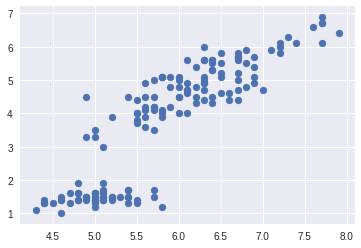

In [4]:
import pylab as plt
%matplotlib inline

plt.scatter(df.sepal_length, df.petal_length)

It would be nice to encode by color and plot all combinations of values, but this isn't easy with matplotlib.  Instead, let's use `seaborn` (`conda install seaborn`).

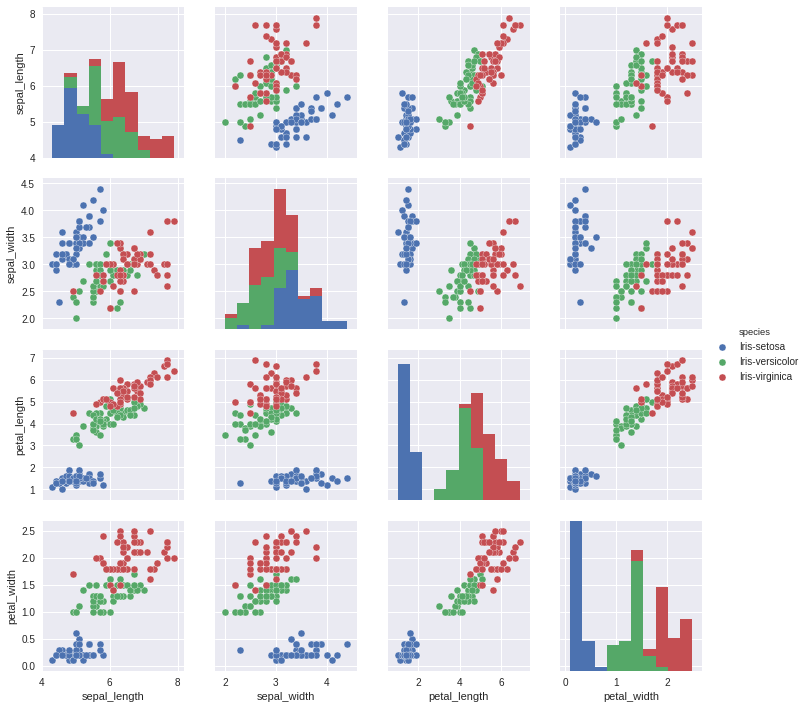

In [5]:
import seaborn as sns

sns.pairplot(df,vars=['sepal_length',
                    'sepal_width',
                    'petal_length',
                    'petal_width'],hue='species')

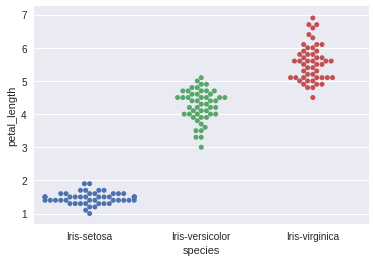

In [10]:
sns.swarmplot(x="species", y="petal_length", data=df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  


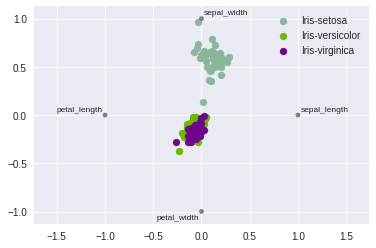

In [11]:
from pandas.tools.plotting import radviz
radviz(df, "species",)

# ***Excercise***

Visit the [https://seaborn.pydata.org/](seaborn site) and make two new plots with this Iris dataset using seaborn functions we haven't used above.

In [15]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 4.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


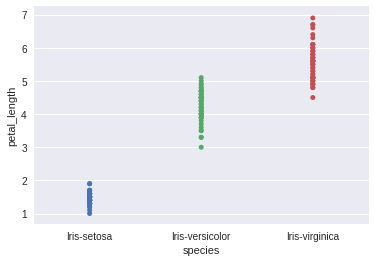

In [18]:
## Plot 1 Here


##sns.swarmplot(x="species", y="petal_length", data=df)
sns.stripplot(x= "species", y = "petal_length", data=df)

In [50]:
## Plot 2 Here

sns.violinplot(x='species', y='petal_length')


ValueError: ignored

## Classification

Let's say that we are an amature botonist and we'd like to determine the specied of Iris in our front yard, but that all we have available to us to make that classification is this dataset and a ruler.


### Approach

This is a classic machine learning / classification problem where we want to used a collection of "labeled" data to help us sort through new data that we receive.  In this case, the new data is a set of four measurements for a flower in our yard.  


Because we have labeled data, this is a "supervised leanring" problem.  If we did not know which species each point in the dataset belonged to, we could still use machine learning for "unsupervised learning".

Let's reimport the data using scikit learn.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
 
iris = datasets.load_iris()
X = iris.data
y = iris.target.astype(float)


# keep only two features and keep only two species
X = X[y != 1, :2]
y = y[y != 1]

X,y, X.shape

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.1],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


### Try Different Classifiers



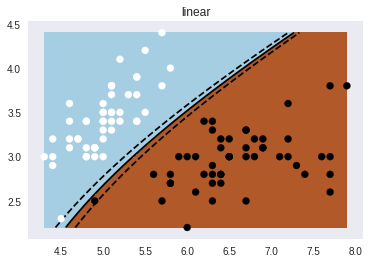

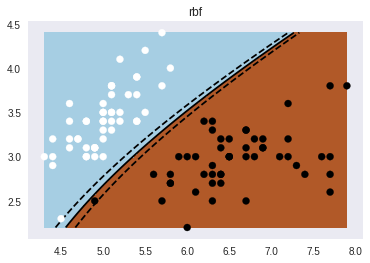

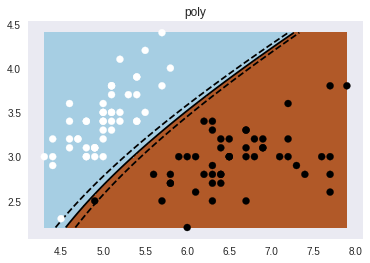

In [65]:
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    #clf = DecisionTreeClassifier()
    clf = RandomForestClassifier()
    clf.fit(X, y)
    
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
   # Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

   # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

### Which Classifier is Best?

First, let's predict the species from the measurements.  Because the classifier is clearly not perfect, we expect some mis-classifications.

In [59]:
y_pred = clf.predict(X)

print(y,y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


### Inaccuracy Score

Because we only have two classes, we can find the accuracy by taking the mean of the magnitude of the difference.  This value is percent of time we are inaccurate. A lower score is better.

In [60]:
for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(kernel,np.mean(np.abs(y-y_pred))*100,'%')

linear 2.0 %
rbf 0.0 %
poly 0.0 %


# ***Excercise***

In the above code we excluded `species==0` and we only classified based on the sepal dimensions.  Complete the following:

- Copy the code cells from above and exclude `species==1`
- Copy the code cells from above and use the petal dimensions for classification

For each case, use the inaccuracy score to see how good the classification works.

In [0]:
## species==1

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
 
iris = datasets.load_iris()
X = iris.data
y = iris.target.astype(float)


# keep only two features and keep only two species
X = X[y != 1, :2]
y = y[y != 1]

X,y, X.shape



In [0]:
## petals


# Clustering

Instead of using the labels, we could ignor the labels and do blind clustering on the dataset. Let's try that with sklearn.

In [0]:
from sklearn.cluster import KMeans, DBSCAN

iris = datasets.load_iris()
X = iris.data
y = iris.target.astype(float)
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'dbscan_iris_1': DBSCAN(eps=1)}

for name, est in estimators.items():
    est.fit(X)
    labels = est.labels_
    df[name] = labels

### Visualize Clusters

Now let's visualize how we did.  We'd hope that the cluster color would be as well-seperated as the original data labels.

In [0]:
sns.pairplot(df,vars=['sepal_length',
                    'sepal_width',
                    'petal_length',
                    'petal_width'],hue='dbscan_iris_1')

### Accuracy

The plot looks good, but it isn't clear how good the labels are until we compare them with the true labels. 

In [0]:
from sklearn.metrics import homogeneity_score

for name, est in estimators.items():
    print('completeness', name, homogeneity_score(df[name],df['species']))
    print('homogeneity', name, homogeneity_score(df['species'],df[name]))

# ***Excercise***

Visit [http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html](sklearn clustering examples) and add two more clustering algorithms of your choice to the comparisons above.

In [0]:
## Algo One


In [0]:
## Algo Two

